In [66]:
import matplotlib.pyplot as plt
from sympy import I, N, re, im, exp, sin, cos, sqrt, pi, eye
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.collections import LineCollection

# Prüfer 2-Group

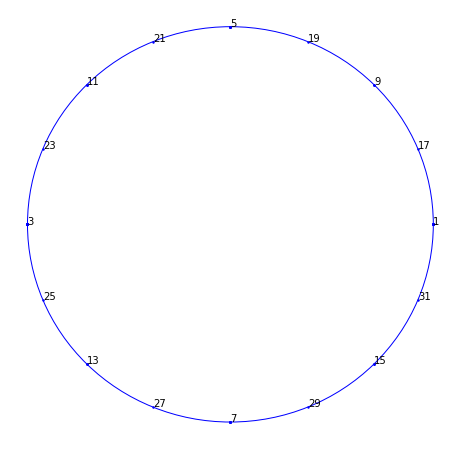

In [76]:
p = 2
n = 4
m = 15
num_elements = m*n
X = [0]*num_elements
Y = [0]*num_elements
labels = [None]*num_elements
roots_cache = [0]*num_elements
i = 0
for n in range(1, n+1):
    for m in range(1, m+1):
        root = exp(2*pi*I*m/p**n)
        X[i] = N(re(root))
        Y[i] = N(im(root))
        item = (X[i], Y[i])
        if item not in roots_cache:
            labels[i] = 1 if item == (1,0) else p**n+m #(n,m)
        roots_cache[i] = item
        i+=1

fig = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.scatter(X, Y, s=2, c='#0000FF')

for i in range(0, num_elements):
    plt.annotate(labels[i], (X[i], Y[i]))

circle = plt.Circle((0, 0), 1, color='b', fill=False)
plt.gca().add_patch(circle)

# Prüfer 3-Group

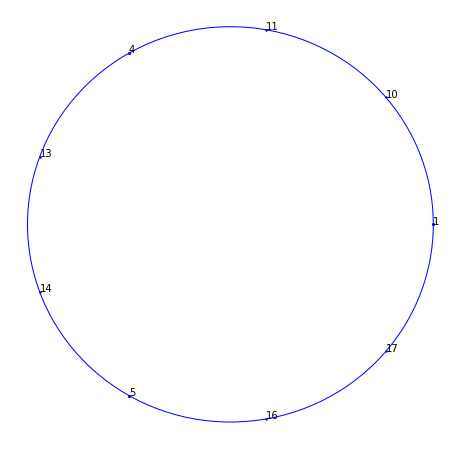

In [77]:
p = 3
n = 2
m = 9
num_elements = m*n
X = [0]*num_elements
Y = [0]*num_elements
labels = [None]*num_elements
roots_cache = [0]*num_elements
i = 0
for n in range(1, n+1):
    for m in range(1, m+1):
        root = exp(2*pi*I*m/p**n)
        X[i] = N(re(root))
        Y[i] = N(im(root))
        item = (X[i], Y[i])
        if item not in roots_cache:
            labels[i] = 1 if item == (1,0) else p**n+m #(n,m)
        roots_cache[i] = item
        i+=1

fig = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.scatter(X, Y, s=2, c='#0000FF')

for i in range(0, num_elements):
    plt.annotate(labels[i], (X[i], Y[i]))

circle = plt.Circle((0, 0), 1, color='b', fill=False)
plt.gca().add_patch(circle)

# Envelope obtained by connecting same labeled vertices from both groups

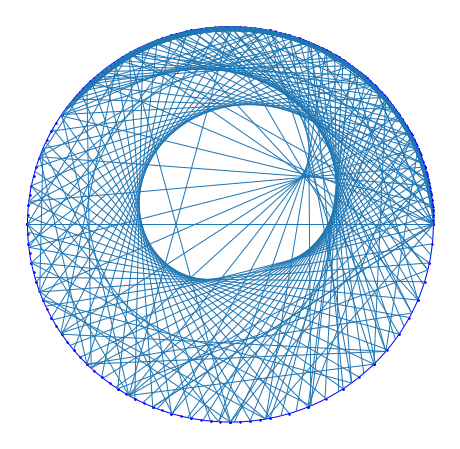

In [75]:
num_elements = 1000

X1 = [None]*num_elements
Y1 = [None]*num_elements

X2 = [None]*num_elements
Y2 = [None]*num_elements

for n in range(1, 100):
    for m in range(1, 100):
        root_p2 = exp(2*pi*I*m/2**n)
        root_p3 = exp(2*pi*I*m/3**n)
        i_p2=2**n+m
        i_p3=3**n+m

        if i_p2 < num_elements:
            X1[i_p2] = N(re(root_p2))
            Y1[i_p2] = N(im(root_p2))

        if i_p3 < num_elements:
            X2[i_p3] = N(re(root_p3))
            Y2[i_p3] = N(im(root_p3))

l = []
for i in range(0, num_elements):
    l.append([(X1[i], Y1[i]), (X2[i], Y2[i])])

fig = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.scatter(X1, Y1, s=2, c='#0000FF')

lc = LineCollection(l, lw=1)
plt.gca().add_collection(lc)

circle = plt.Circle((0, 0), 1, color='b', fill=False)
plt.gca().add_patch(circle)

# Experimental Code

In [69]:
def rotate(t):
    #rotate unit vector [0, 1] by "t"
    x = math.sin(t)
    y = math.cos(t)
    return (x, y)

def get_angle_2(x):
    if x == 1:
        return 0
    
    n = int(math.log2(x))
    k = x - 2**n
    return 2*np.pi - 2*np.pi*k/2**n

def get_angle_3(x):
    if x == 1:
        return 0
    
    n = int(math.log(x, 3))
    k = x - 3**n
    return 2*np.pi - 2*np.pi*k/3**n

def get_angle_3_(x):
    if x == 1:
        return 0
    
    x_base3 = np.base_repr(x, base=3)
    N = len(x_base3)
    arr = ["0"]*N
    arr[0] = "1"
    y = int("".join(arr), base=3)
    print("x={0}".format(x))
    print("y={0}".format(y))
    return (360/(N-1)*(x-y))%360

#print("angle={0}".format(get_angle_2(3)))
print("angle={0}".format(get_angle_3(12)))

angle=4.188790204786391


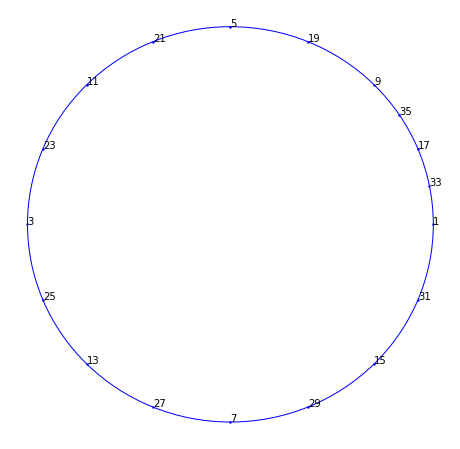

In [70]:
n_points = 18

x = np.empty([n_points])
y = np.empty([n_points])

for i in range(0, n_points):
    angle = get_angle_2(2*i+1) + np.pi/2
    rot_xy = rotate(angle)
    x[i] = rot_xy[0]
    y[i] = rot_xy[1]

fig = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.scatter(x, y, s=2, c='#0000FF')

for i in range(0, n_points):
    plt.annotate(2*i+1, (x[i], y[i]))

circle = plt.Circle((0, 0), 1, color='b', fill=False)
plt.gca().add_patch(circle)


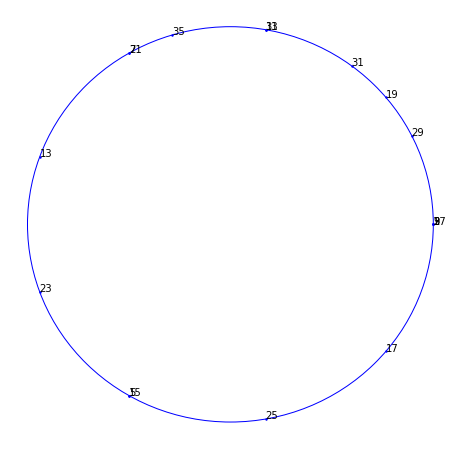

In [71]:
n_points = 18

x = np.empty([n_points])
y = np.empty([n_points])

for i in range(0, n_points):
    angle = get_angle_3(2*i+1) + np.pi/2
    rot_xy = rotate(angle)
    x[i] = rot_xy[0]
    y[i] = rot_xy[1]

fig = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.scatter(x, y, s=2, c='#0000FF')

for i in range(0, n_points):
    plt.annotate(2*i+1, (x[i], y[i]))

circle = plt.Circle((0, 0), 1, color='b', fill=False)
plt.gca().add_patch(circle)

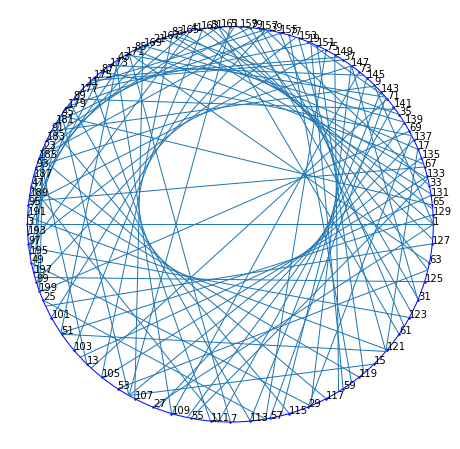

In [72]:
n_points = 100

x1 = np.empty([n_points])
y1 = np.empty([n_points])

for i in range(0, n_points):
    angle = get_angle_2(2*i+1) + np.pi/2
    rot_xy = rotate(angle)
    x1[i] = rot_xy[0]
    y1[i] = rot_xy[1]

x2 = np.empty([n_points])
y2 = np.empty([n_points])

for i in range(0, n_points):
    angle = get_angle_3(2*i+1) + np.pi/2
    rot_xy = rotate(angle)
    x2[i] = rot_xy[0]
    y2[i] = rot_xy[1]

l = []
for i in range(0, n_points):
    l.append([(x1[i], y1[i]), (x2[i], y2[i])])

fig = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.scatter(x1, y1, s=2, c='#0000FF')

for i in range(0, n_points):
    plt.annotate(2*i+1, (x1[i], y1[i]))

lc = LineCollection(l, lw=1)
plt.gca().add_collection(lc)

circle = plt.Circle((0, 0), 1, color='b', fill=False)
plt.gca().add_patch(circle)
